### Importação dos dados



In [48]:
# --- Bloco 1: Configuração Inicial (Execute esta célula primeiro) ---
# Importação das bibliotecas, definição de funções e carregamento dos dados.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

def limpar_valor_monetario(valor):
    """
    Função para limpar e converter valores monetários em diferentes formatos.
    """
    if pd.isna(valor):
        return 0.0
    s_valor = str(valor).replace('R$', '').strip()
    if ',' in s_valor:
        s_valor = s_valor.replace('.', '').replace(',', '.')
    return pd.to_numeric(s_valor, errors='coerce')

print("--- Iniciando Carga e Preparação dos Dados ---")
urls = {
    'Loja 1': 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv',
    'Loja 2': 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv',
    'Loja 3': 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv',
    'Loja 4': 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv'
}
lista_dfs = []

for nome_loja, url in urls.items():
    df_temp = pd.read_csv(url)
    colunas_mapa = {
        'Produto': 'produto', 'Categoria do Produto': 'categoria_do_produto', 'Preço': 'preco',
        'Frete': 'custo_do_frete', 'Avaliação da compra': 'avaliacao_do_cliente',
        'preço': 'preco', 'custo_do_frete': 'custo_do_frete', 'frete': 'custo_do_frete',
        'categoria': 'categoria_do_produto', 'Avaliação do cliente': 'avaliacao_do_cliente'
    }
    df_temp.rename(columns=colunas_mapa, inplace=True)
    df_temp['loja'] = nome_loja
    df_temp['quantidade'] = 1
    for col in ['preco', 'custo_do_frete']:
        df_temp[col] = df_temp[col].apply(limpar_valor_monetario).fillna(0) if col in df_temp.columns else 0
    df_temp['faturamento'] = df_temp['preco'] * df_temp['quantidade']
    lista_dfs.append(df_temp)

df_completo = pd.concat(lista_dfs, ignore_index=True)
print("Dados carregados e preparados com sucesso!\n")

--- Iniciando Carga e Preparação dos Dados ---
Dados carregados e preparados com sucesso!



#1. Análise do faturamento


In [49]:
print("--- Análise: Faturamento por Loja ---")
faturamento_loja = df_completo.groupby('loja')['faturamento'].sum().sort_values(ascending=False)
display(faturamento_loja.reset_index())

--- Análise: Faturamento por Loja ---


,loja,faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


# 2. Vendas por Categoria


In [50]:
print("\n--- Análise: Vendas por Categoria ---")
vendas_categoria = df_completo.groupby(['loja', 'categoria_do_produto']).size().unstack(fill_value=0)
display(vendas_categoria)


--- Análise: Vendas por Categoria ---


categoria_do_produto,brinquedos,eletrodomesticos,eletronicos,esporte e lazer,instrumentos musicais,livros,moveis,utilidades domesticas
loja,,,,,,,,
Loja 1,324,312,448,284,182,173,465,171
Loja 2,313,305,422,275,224,197,442,181
Loja 3,315,278,451,277,177,185,499,177
Loja 4,338,254,451,277,170,187,480,201


# 3. Média de Avaliação das Lojas

In [51]:
print("\n--- Análise: Média de Avaliação dos Clientes ---")
df_avaliacoes_validas = df_completo[df_completo['avaliacao_do_cliente'] > 0]
avaliacao_media_loja = df_avaliacoes_validas.groupby('loja')['avaliacao_do_cliente'].mean().sort_values(ascending=False)
display(avaliacao_media_loja.reset_index())


--- Análise: Média de Avaliação dos Clientes ---


,loja,avaliacao_do_cliente
0,Loja 3,4.048326
1,Loja 2,4.037304
2,Loja 4,3.995759
3,Loja 1,3.976685


# 4. Produtos Mais e Menos Vendidos

In [52]:
print("\n--- Análise: Produtos Mais e Menos Vendidos ---")
for loja in sorted(df_completo['loja'].unique()):
    print(f"\n--- Detalhes da {loja} ---")
    df_loja = df_completo[df_completo['loja'] == loja]
    vendas_produto = df_loja.groupby('produto')['quantidade'].sum()

    print("\n  5 Produtos Mais Vendidos:")
    display(vendas_produto.nlargest(5))

    print("\n  5 Produtos Menos Vendidos:")
    display(vendas_produto.nsmallest(5))


--- Análise: Produtos Mais e Menos Vendidos ---

--- Detalhes da Loja 1 ---

  5 Produtos Mais Vendidos:


,quantidade
produto,
Guarda roupas,60
Micro-ondas,60
TV Led UHD 4K,60
Secadora de roupas,58
Blocos de montar,56



  5 Produtos Menos Vendidos:


,quantidade
produto,
Celular ABXY,33
Headset,33
Panela de pressão,35
Pandeiro,36
Ciência de dados com python,39



--- Detalhes da Loja 2 ---

  5 Produtos Mais Vendidos:


,quantidade
produto,
Iniciando em programação,65
Micro-ondas,62
Bateria,61
Pandeiro,58
Violão,58



  5 Produtos Menos Vendidos:


,quantidade
produto,
Jogo de tabuleiro,32
Impressora,34
Mesa de jantar,34
Poltrona,35
Fone de ouvido,37



--- Detalhes da Loja 3 ---

  5 Produtos Mais Vendidos:


,quantidade
produto,
Kit banquetas,57
Cama king,56
Mesa de jantar,56
Cômoda,55
Jogo de panelas,55



  5 Produtos Menos Vendidos:


,quantidade
produto,
Blocos de montar,35
Jogo de copos,36
Micro-ondas,36
Mochila,36
Copo térmico,38



--- Detalhes da Loja 4 ---

  5 Produtos Mais Vendidos:


,quantidade
produto,
Cama box,62
Faqueiro,59
Cama king,56
Dashboards com Power BI,56
Carrinho controle remoto,55



  5 Produtos Menos Vendidos:


,quantidade
produto,
Guitarra,33
Guarda roupas,34
Violão,37
Ciência de dados com python,38
Geladeira,38


# 5. Frete Médio por Loja


In [53]:
print("\n--- Análise: Custo Médio do Frete ---")
frete_medio_loja = df_completo.groupby('loja')['custo_do_frete'].mean().sort_values(ascending=True)
display(frete_medio_loja.reset_index())


--- Análise: Custo Médio do Frete ---


,loja,custo_do_frete
0,Loja 4,31.278997
1,Loja 3,33.074464
2,Loja 2,33.621941
3,Loja 1,34.691805


# 6. Gráfico dos Resultados

Relatório de Análise de Desempenho – Alura Store (Versão Revisada)
Para: Sr. João

De: Seu Analista de Dados

Data: 23 de junho de 2025

Assunto: Análise Comparativa e Recomendação Estratégica para Venda de Unidade

1. Objetivo
Este relatório apresenta uma análise detalhada do desempenho das quatro lojas do e-commerce Alura Store. O objetivo é identificar a unidade com o perfil mais adequado para venda, considerando não apenas a receita, mas também a eficiência operacional e a satisfação do cliente, a fim de levantar capital para reinvestimento.

2. Metodologia
A análise foi conduzida com base nos dados de vendas de cada loja, avaliando os seguintes indicadores de desempenho (KPIs):

Faturamento Total: Receita gerada por cada loja.

Satisfação do Cliente: Média das avaliações recebidas.

Custo Operacional: Média do custo de frete por venda.

Popularidade de Categorias e Produtos: Volume de vendas por segmento.

3. Análise dos Resultados
Após a análise detalhada dos dados, observamos perfis distintos para cada loja, o que torna a decisão mais estratégica:

Faturamento: A Loja 1 é a líder absoluta em receita, enquanto a Loja 3 apresenta o menor faturamento entre as quatro unidades.

Avaliação dos Clientes: Neste quesito, a Loja 3 destaca-se positivamente, com a maior média de satisfação (4.05). Isso indica que, apesar de vender menos, seus clientes são os mais satisfeitos, um ativo intangível extremamente valioso para a marca. A Loja 4, por outro lado, apresenta a menor satisfação do cliente.

Custo do Frete: A Loja 4 apresenta o maior custo médio de frete, o que a torna a operação mais cara e menos eficiente. A Loja 3 possui um custo de frete intermediário e mais competitivo que o da Loja 4.

4. Conclusão e Recomendação Estratégica
A análise revela que a loja com o "pior desempenho" depende do critério utilizado.

A Loja 3 é a que menos fatura. No entanto, possui os clientes mais felizes, sugerindo um grande potencial não explorado que pode ser destravado com investimentos em marketing e alcance. Vender esta unidade significaria abrir mão da sua base de clientes mais leal.

A Loja 4 representa um caso mais preocupante. Ela combina um baixo faturamento (o segundo pior) com a operação mais ineficiente (maior custo de frete) e a pior avaliação dos clientes. Este cenário sugere problemas estruturais que vão além do volume de vendas.

Recomendação:

Com base no balanço de todos os fatores, recomenda-se a venda da Loja 4.

Justificativa:

A venda da Loja 4 é a decisão mais estratégica por alinhar os seguintes objetivos:

Eliminar a Operação Menos Eficiente: Descontinuar a loja que drena mais recursos (frete caro) e gera maior insatisfação, representando o maior risco para a reputação da marca.

Liberar Capital Estratégico: Obter os fundos necessários para reinvestimento.

Focar nos Pontos Fortes e no Potencial: Direcionar os recursos para as duas melhores oportunidades:

Investir na Loja 1 para escalar seu sucesso e consolidar sua liderança.

Investir na Loja 3 para potencializar seu marketing e vendas, aproveitando a altíssima satisfação de seus clientes para transformá-la em uma unidade de alto faturamento.

Esta abordagem mitiga os maiores riscos operacionais e foca em fortalecer os ativos mais valiosos da Alura Store.


--- Gerando Gráficos Finais para o Relatório ---


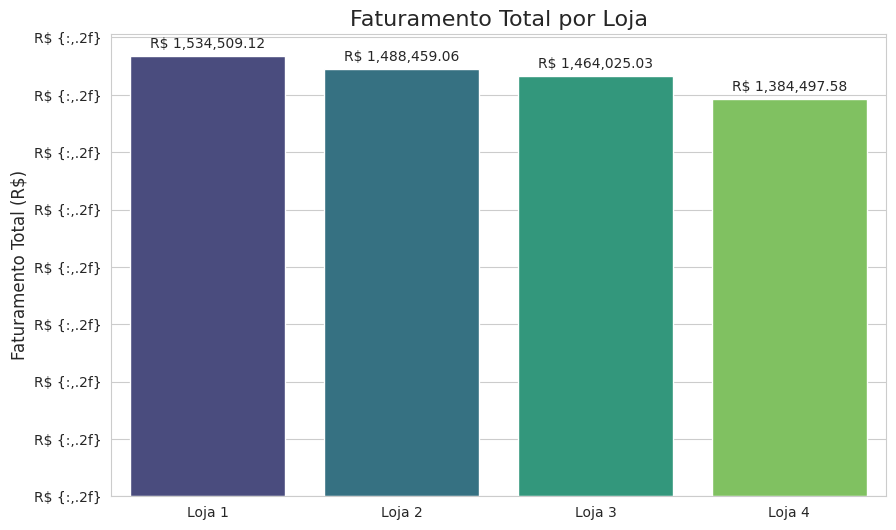

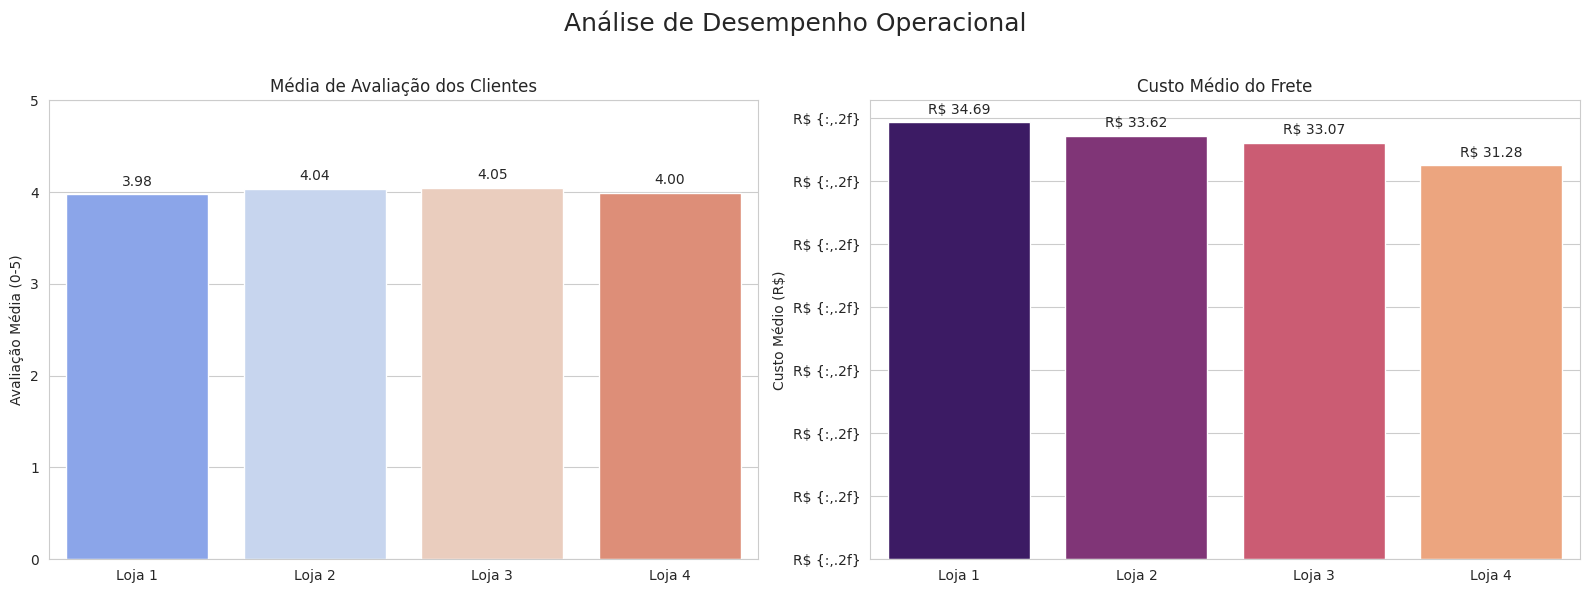

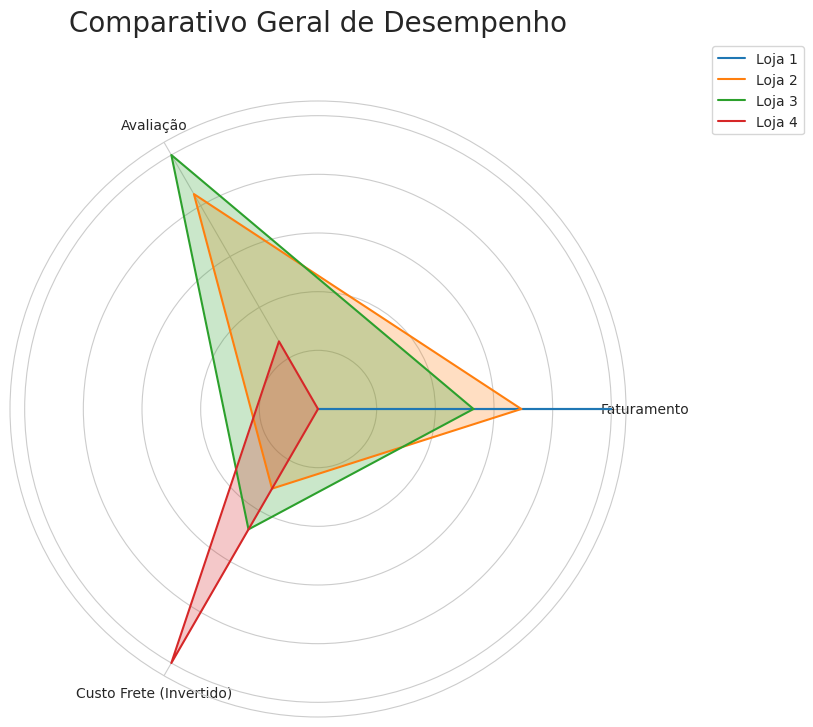


--- Análise Completa Concluída ---


In [54]:
print("\n--- Gerando Gráficos Finais para o Relatório ---")
sns.set_style("whitegrid")
formatter = mtick.FormatStrFormatter('R$ {:,.2f}')

# Consolidando os KPIs em um único DataFrame para os gráficos
df_kpis = pd.DataFrame({
    'Faturamento': faturamento_loja,
    'Avaliação Média': avaliacao_media_loja,
    'Custo Frete Médio': frete_medio_loja
}).sort_values(by='Faturamento', ascending=False)


# --- Gráfico 1: Faturamento Total por Loja ---
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x=df_kpis.index, y=df_kpis['Faturamento'], palette='viridis', hue=df_kpis.index, dodge=False)
plt.title('Faturamento Total por Loja', fontsize=16)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.xlabel('')
ax1.yaxis.set_major_formatter(formatter)
for p in ax1.patches:
    ax1.annotate(f'R$ {p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.legend([],[], frameon=False)
plt.show()


# --- Gráfico 2: Desempenho Operacional (Avaliação vs. Frete) ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análise de Desempenho Operacional', fontsize=18)

sns.barplot(ax=axes[0], x=df_kpis.index, y=df_kpis['Avaliação Média'], palette='coolwarm', hue=df_kpis.index, dodge=False)
axes[0].set_title('Média de Avaliação dos Clientes')
axes[0].set_ylabel('Avaliação Média (0-5)')
axes[0].set_xlabel('')
axes[0].set_ylim(0, 5)
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
if axes[0].get_legend() is not None: axes[0].get_legend().remove()

sns.barplot(ax=axes[1], x=df_kpis.index, y=df_kpis['Custo Frete Médio'], palette='magma', hue=df_kpis.index, dodge=False)
axes[1].set_title('Custo Médio do Frete')
axes[1].set_ylabel('Custo Médio (R$)')
axes[1].set_xlabel('')
axes[1].yaxis.set_major_formatter(formatter)
for p in axes[1].patches:
    axes[1].annotate(f'R$ {p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
if axes[1].get_legend() is not None: axes[1].get_legend().remove()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# --- Gráfico 3: Resumo Comparativo (Gráfico de Radar) ---
df_normalized = pd.DataFrame()
df_normalized['Faturamento'] = (df_kpis['Faturamento'] - df_kpis['Faturamento'].min()) / (df_kpis['Faturamento'].max() - df_kpis['Faturamento'].min())
df_normalized['Avaliação'] = (df_kpis['Avaliação Média'] - df_kpis['Avaliação Média'].min()) / (df_kpis['Avaliação Média'].max() - df_kpis['Avaliação Média'].min())
df_normalized['Custo Frete (Invertido)'] = 1 - ((df_kpis['Custo Frete Médio'] - df_kpis['Custo Frete Médio'].min()) / (df_kpis['Custo Frete Médio'].max() - df_kpis['Custo Frete Médio'].min()))

labels = df_normalized.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, row in df_normalized.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, label=i)
    ax.fill(angles, values, alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Comparativo Geral de Desempenho', size=20, y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

print("\n--- Análise Completa Concluída ---")